##Healthcare Test Results Classification

In [182]:
!pip install category_encoders

##Imports

In [183]:
import pandas as pd
import category_encoders as ce
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [184]:
file_path = '/content/students_train.csv'

In [185]:
df = pd.read_csv(file_path)

##Studying The Dataset

In [186]:
df.describe()

,ID,Age,Billing Amount,Room Number
count,50000.000000,50000.000000,50000.000000,50000.000000
mean,25000.500000,51.580360,25555.691557,301.032260
std,14433.901067,19.582194,14215.932247,115.228819
min,1.000000,18.000000,-2008.492140,101.000000
25%,12500.750000,35.000000,13239.403090,202.000000
50%,25000.500000,52.000000,25541.302835,302.000000
75%,37500.250000,68.000000,37853.996817,400.000000
max,50000.000000,85.000000,52764.276740,500.000000


In [187]:
df.dropna(inplace=True)

In [188]:
# Value counts for categorical features
print(df['Blood Type'].value_counts())
print(df['Insurance Provider'].value_counts())
print(df['Admission Type'].value_counts())

Blood Type
AB+    6291
B+     6278
A-     6261
AB-    6259
A+     6246
O+     6235
B-     6230
O-     6200
Name: count, dtype: int64
Insurance Provider
Cigna               10091
Medicare            10058
UnitedHealthcare    10002
Blue Cross          10001
Aetna                9848
Name: count, dtype: int64
Admission Type
Elective     16827
Urgent       16784
Emergency    16389
Name: count, dtype: int64


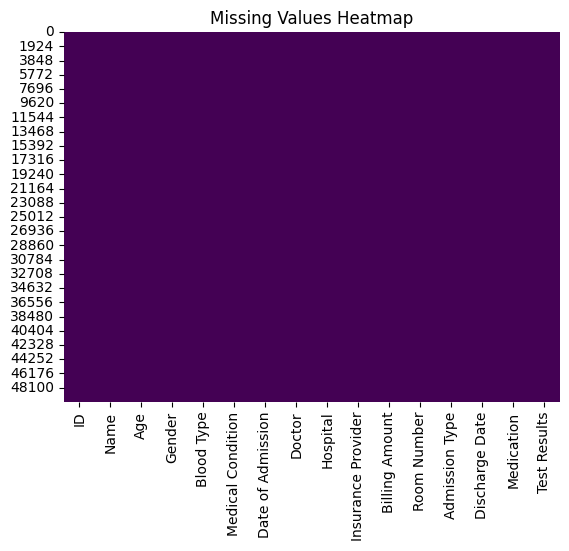

In [189]:
# Visualize missing values -> No Nulls
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [190]:
df['Name'] = df['Name'].str.title()

print(df['Name'].head())

0    Bobby Jackson
1     Leslie Terry
2      Danny Smith
3     Andrew Watts
4    Adrienne Bell
Name: Name, dtype: object


In [191]:
df = pd.get_dummies(df, columns=['Gender'])

In [192]:
print(df['Gender_Male'].head())

0     True
1     True
2    False
3    False
4    False
Name: Gender_Male, dtype: bool


In [193]:
df['Blood Type'].unique()

array(['B-', 'A+', 'A-', 'O+', 'AB+', 'AB-', 'B+', 'O-'], dtype=object)

In [194]:
df = pd.get_dummies(df, columns=['Blood Type'])

In [195]:
print(df['Blood Type_A-'].head())

0    False
1    False
2     True
3    False
4    False
Name: Blood Type_A-, dtype: bool


In [196]:
df['Medical Condition'].unique()

array(['Cancer', 'Obesity', 'Diabetes', 'Asthma', 'Hypertension',
       'Arthritis'], dtype=object)

In [197]:
df = pd.get_dummies(df, columns=['Medical Condition'])

In [198]:
print(df['Medical Condition_Cancer'].head())

0     True
1    False
2    False
3    False
4     True
Name: Medical Condition_Cancer, dtype: bool


In [199]:
df['Date of Admission'].unique()

array(['1/31/2024', '8/20/2019', '9/22/2022', ..., '5/31/2019',
       '10/12/2023', '3/14/2021'], dtype=object)

In [200]:
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'], errors='coerce')

In [201]:
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'], errors='coerce')

In [202]:
print(df['Date of Admission'].head())

0   2024-01-31
1   2019-08-20
2   2022-09-22
3   2020-11-18
4   2022-09-19
Name: Date of Admission, dtype: datetime64[ns]


In [203]:
print(df['Discharge Date'].head())

0   2024-02-02
1   2019-08-26
2   2022-10-07
3   2020-12-18
4   2022-10-09
Name: Discharge Date, dtype: datetime64[ns]


In [204]:
df['Doctor'] = df['Doctor'].str.title()

print(df['Doctor'].head())

0       Matthew Smith
1     Samantha Davies
2    Tiffany Mitchell
3         Kevin Wells
4      Kathleen Hanna
Name: Doctor, dtype: object


In [205]:
df['Hospital'] = df['Hospital'].str.title()

print(df['Hospital'].head())

0               Sons And Miller
1                       Kim Inc
2                      Cook Plc
3    Hernandez Rogers And Vang,
4                   White-White
Name: Hospital, dtype: object


In [206]:
df['Insurance Provider'].unique()

array(['Blue Cross', 'Medicare', 'Aetna', 'UnitedHealthcare', 'Cigna'],
      dtype=object)

In [207]:
df = pd.get_dummies(df, columns=['Insurance Provider'])

In [208]:
print(df['Insurance Provider_Blue Cross'].head())

0     True
1    False
2    False
3    False
4    False
Name: Insurance Provider_Blue Cross, dtype: bool


In [209]:
df['Admission Type'].unique()

array(['Urgent', 'Emergency', 'Elective'], dtype=object)

In [210]:
df = pd.get_dummies(df, columns=['Admission Type'])

In [211]:
print(df['Admission Type_Emergency'].head())

0    False
1     True
2     True
3    False
4    False
Name: Admission Type_Emergency, dtype: bool


In [212]:
df['Medication'].unique()

array(['Paracetamol', 'Ibuprofen', 'Aspirin', 'Penicillin', 'Lipitor'],
      dtype=object)

In [213]:
df = pd.get_dummies(df, columns=['Medication'])

In [214]:
print(df['Medication_Paracetamol'].head())

0     True
1    False
2    False
3    False
4    False
Name: Medication_Paracetamol, dtype: bool


##Data Preprocessing

In [215]:
Q1 = df['Billing Amount'].quantile(0.25)
Q3 = df['Billing Amount'].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify rows where 'Billing amount' is an outlier
outliers = df[(df['Billing Amount'] < lower_bound) | (df['Billing Amount'] > upper_bound)]

# Print the number of outliers
print(f"Number of outliers based on IQR: {len(outliers)}")

Number of outliers based on IQR: 0


In [216]:
df['Billing_Is_Negative'] = df['Billing Amount'] < 0
df['Billing Amount'] = df['Billing Amount'].abs()

In [217]:
# Add a flag for negative values
df['Billing_Is_Negative'] = df['Billing Amount'] < 0

# Convert billing amount to positive for modeling
df['Billing Amount'] = df['Billing Amount'].abs()

In [218]:
df['Name'] = df['Name'].str.strip()
df['Name'] = df['Name'].str.replace(r'\s+', '_', regex=True)

In [219]:
df['Doctor'] = df['Doctor'].str.strip()
df['Doctor'] = df['Doctor'].str.replace(r'\s+', '_', regex=True)

In [220]:
df['Hospital'] = df['Hospital'].str.strip()
df['Hospital'] = df['Hospital'].str.replace(r'\s+', '_', regex=True)

In [221]:
df['Test Results'].unique()

array(['Normal', 'Inconclusive', 'Abnormal'], dtype=object)

In [222]:
test_results_map = {'Normal': 0, 'Inconclusive': 1, 'Abnormal': 2}

# Apply the mapping
df['Test Results'] = df['Test Results'].map(test_results_map)

In [223]:
print(df['Test Results'].head)

<bound method NDFrame.head of 0        0
1        1
2        0
3        2
4        2
        ..
49995    1
49996    2
49997    2
49998    2
49999    1
Name: Test Results, Length: 50000, dtype: int64>


Correlation with target 'Result':
Test Results                           1.000000
Medical Condition_Arthritis            0.009866
Age                                    0.008891
Blood Type_A+                          0.004216
Gender_Female                          0.003960
Medical Condition_Obesity              0.003774
Admission Type_Elective                0.002711
Blood Type_O+                          0.002592
Insurance Provider_Cigna               0.002573
Medication_Paracetamol                 0.002474
Medical Condition_Cancer               0.002393
Medical Condition_Diabetes             0.001914
Billing Amount                         0.001769
Blood Type_B+                          0.001693
Insurance Provider_Medicare            0.001604
Medication_Ibuprofen                   0.000880
Medication_Lipitor                     0.000693
Blood Type_O-                          0.000600
Admission Type_Emergency              -0.000044
Insurance Provider_Aetna              -0.000266
Insura

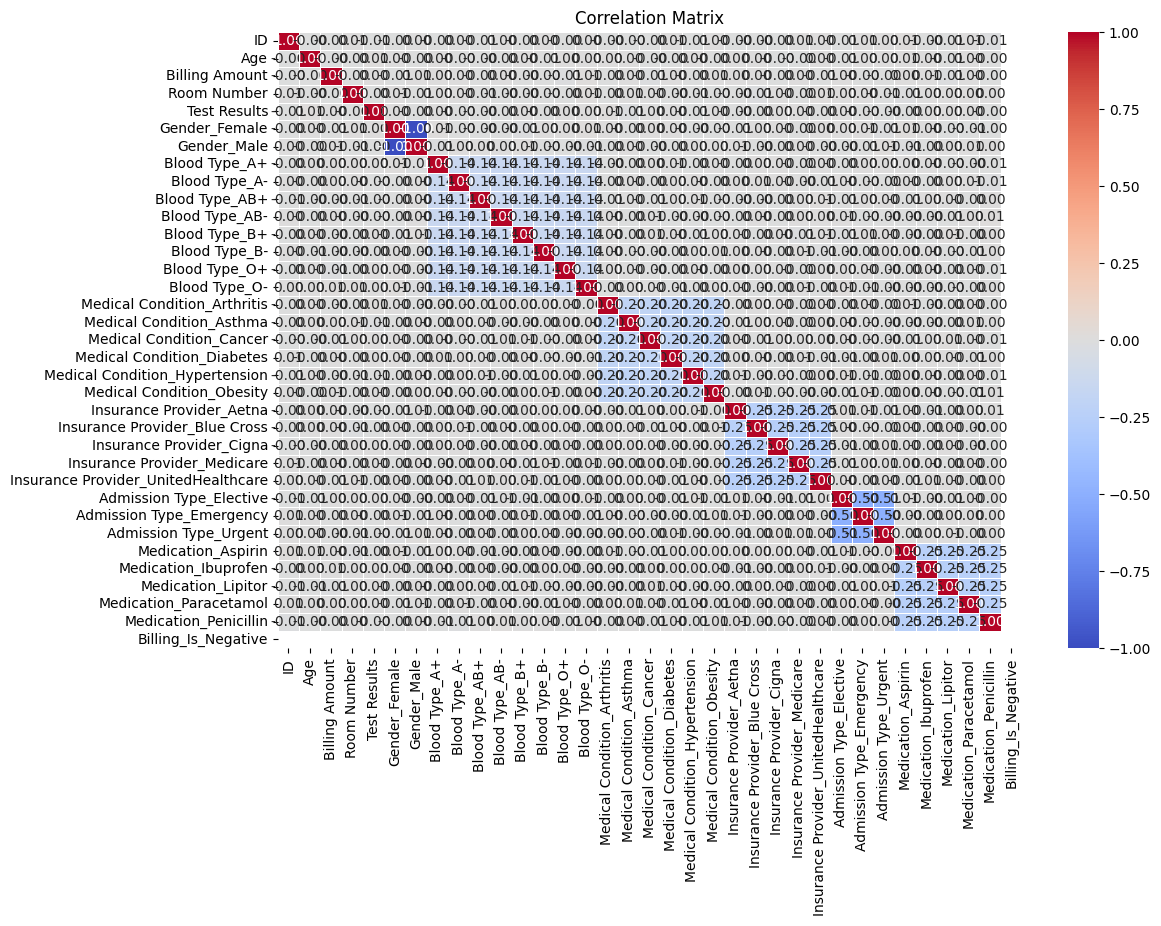

In [224]:
# Compute the correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Display only correlation with the 'Result' column
print("Correlation with target 'Result':")
print(correlation_matrix['Test Results'].sort_values(ascending=False))

# Optional: Heatmap of the full correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

##Normalization

In [225]:
# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Reshape the 'Billing Amount' column to a 2D array
billing_amount_values = df['Billing Amount'].values.reshape(-1, 1)

# Fit the scaler to the data and transform it
normalized_billing_amount = scaler.fit_transform(billing_amount_values)

# Update the 'Billing Amount' column in the DataFrame
df['Billing Amount'] = normalized_billing_amount

In [226]:
print(df['Billing Amount'].head())

0    0.357256
1    0.637552
2    0.529729
3    0.718425
4    0.269720
Name: Billing Amount, dtype: float64


In [227]:
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify rows where 'Billing amount' is an outlier
outliers = df[(df['Age'] < lower_bound) | (df['Age'] > upper_bound)]

# Print the number of outliers
print(f"Number of outliers based on IQR: {len(outliers)}")

Number of outliers based on IQR: 0


In [228]:
# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Reshape the 'Billing Amount' column to a 2D array
age_values = df['Age'].values.reshape(-1, 1)

# Fit the scaler to the data and transform it
normalized_age = scaler.fit_transform(age_values)

# Update the 'Billing Amount' column in the DataFrame
df['Age'] = normalized_age

In [229]:
print(df['Age'].head())

0    0.179104
1    0.656716
2    0.865672
3    0.149254
4    0.373134
Name: Age, dtype: float64


In [230]:
# Compute the correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Display only correlation with the 'Result' column
print("Correlation with target 'Result':")
print(correlation_matrix['Test Results'].sort_values(ascending=False))

Correlation with target 'Result':
Test Results                           1.000000
Medical Condition_Arthritis            0.009866
Age                                    0.008891
Blood Type_A+                          0.004216
Gender_Female                          0.003960
Medical Condition_Obesity              0.003774
Admission Type_Elective                0.002711
Blood Type_O+                          0.002592
Insurance Provider_Cigna               0.002573
Medication_Paracetamol                 0.002474
Medical Condition_Cancer               0.002393
Medical Condition_Diabetes             0.001914
Billing Amount                         0.001769
Blood Type_B+                          0.001693
Insurance Provider_Medicare            0.001604
Medication_Ibuprofen                   0.000880
Medication_Lipitor                     0.000693
Blood Type_O-                          0.000600
Admission Type_Emergency              -0.000044
Insurance Provider_Aetna              -0.000266
Insura

## Dropping Unnecessary Columns

In [231]:
df = df.drop('ID', axis=1)

In [232]:
df = df.drop('Name', axis=1)

In [233]:
df = df.drop('Room Number', axis=1)

In [234]:
df['Days Spent'] = (df['Discharge Date'] - df['Date of Admission']).dt.days

In [235]:
df = df.drop('Discharge Date', axis=1)

In [236]:
df = df.drop('Date of Admission', axis=1)

In [237]:
print(df['Days Spent'].head())

0     2
1     6
2    15
3    30
4    20
Name: Days Spent, dtype: int64


## Correlation Matrix

In [238]:
# Compute the correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Display only correlation with the 'Result' column
print("Correlation with target 'Result':")
print(correlation_matrix['Test Results'].sort_values(ascending=False))

Correlation with target 'Result':
Test Results                           1.000000
Medical Condition_Arthritis            0.009866
Age                                    0.008891
Blood Type_A+                          0.004216
Gender_Female                          0.003960
Medical Condition_Obesity              0.003774
Admission Type_Elective                0.002711
Blood Type_O+                          0.002592
Insurance Provider_Cigna               0.002573
Medication_Paracetamol                 0.002474
Medical Condition_Cancer               0.002393
Medical Condition_Diabetes             0.001914
Billing Amount                         0.001769
Blood Type_B+                          0.001693
Insurance Provider_Medicare            0.001604
Medication_Ibuprofen                   0.000880
Medication_Lipitor                     0.000693
Blood Type_O-                          0.000600
Admission Type_Emergency              -0.000044
Insurance Provider_Aetna              -0.000266
Insura

In [239]:
df = df.drop('Billing_Is_Negative', axis=1)

## Checking Outliers

In [240]:
Q1 = df['Days Spent'].quantile(0.25)
Q3 = df['Days Spent'].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify rows where 'Billing amount' is an outlier
outliers = df[(df['Days Spent'] < lower_bound) | (df['Days Spent'] > upper_bound)]

# Print the number of outliers
print(f"Number of outliers based on IQR: {len(outliers)}")

Number of outliers based on IQR: 0


## MinMax Scaller

In [241]:
# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Reshape the 'Billing Amount' column to a 2D array
days_spent_values = df['Days Spent'].values.reshape(-1, 1)

# Fit the scaler to the data and transform it
normalized_days_spent = scaler.fit_transform(days_spent_values)

# Update the 'Billing Amount' column in the DataFrame
df['Days Spent'] = normalized_days_spent

In [242]:
print(df['Days Spent'].head())

0    0.034483
1    0.172414
2    0.482759
3    1.000000
4    0.655172
Name: Days Spent, dtype: float64


In [243]:
print("Summary Statistics:\n")
print(df.describe())

Summary Statistics:

                Age  Billing Amount  Test Results    Days Spent
count  50000.000000    50000.000000  50000.000000  50000.000000
mean       0.501199        0.484283      1.001760      0.500019
std        0.292272        0.269406      0.818004      0.298324
min        0.000000        0.000000      0.000000      0.000000
25%        0.253731        0.250785      0.000000      0.241379
50%        0.507463        0.483974      1.000000      0.482759
75%        0.746269        0.717368      2.000000      0.758621
max        1.000000        1.000000      2.000000      1.000000


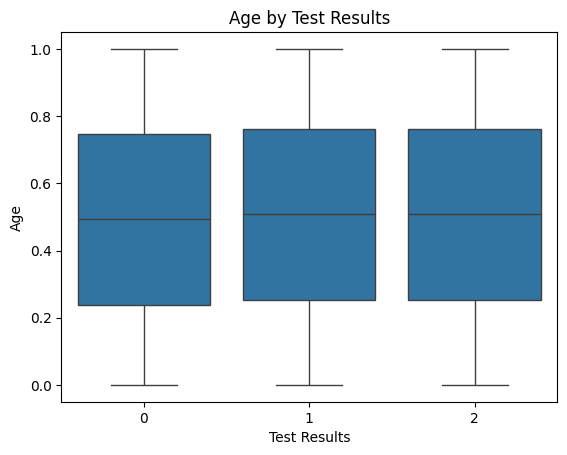

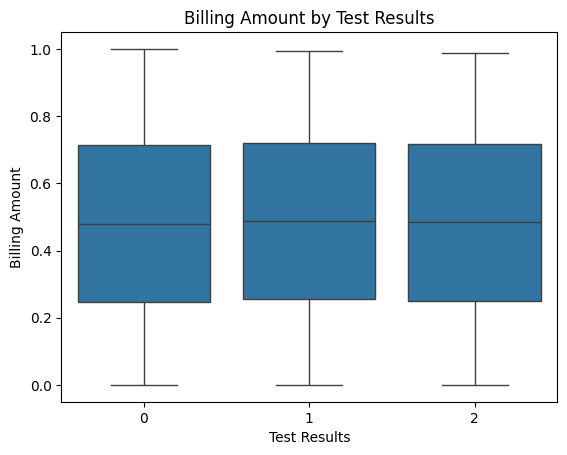

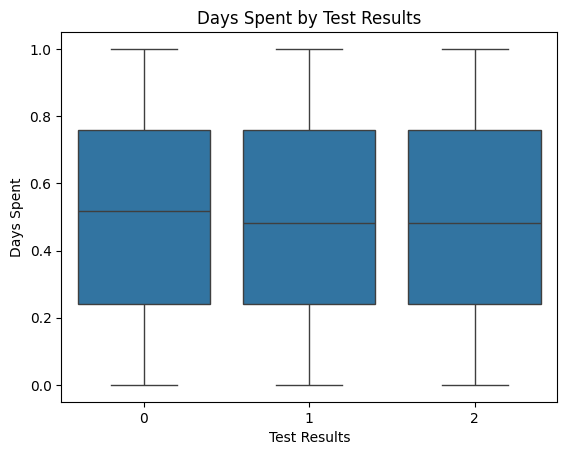

In [244]:
# Boxplots of numerical features by Test Results -> three boxplots show the 3 features not a strong predictor for target variable
sns.boxplot(x='Test Results', y='Age', data=df)
plt.title('Age by Test Results')
plt.show()

sns.boxplot(x='Test Results', y='Billing Amount', data=df)
plt.title('Billing Amount by Test Results')
plt.show()

sns.boxplot(x='Test Results', y='Days Spent', data=df)
plt.title('Days Spent by Test Results')
plt.show()

## Histogram Plotting

<Axes: xlabel='Age', ylabel='Count'>

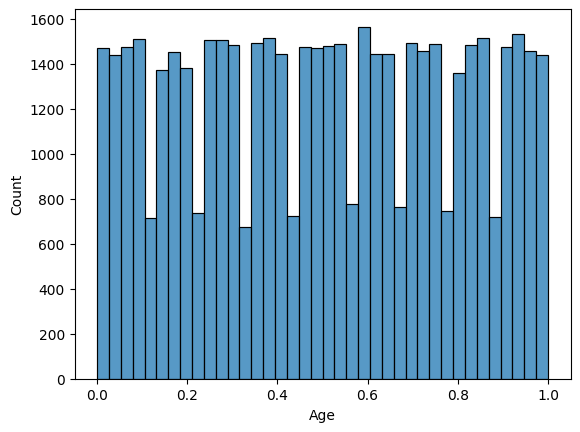

In [245]:
sns.histplot(df['Age'])

<Axes: xlabel='Billing Amount', ylabel='Count'>

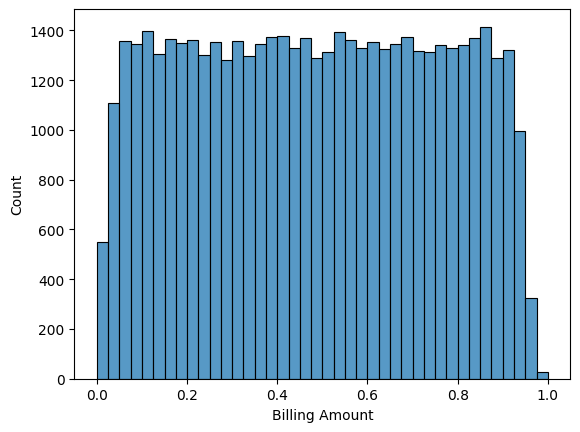

In [246]:
sns.histplot(df['Billing Amount'])

<Axes: xlabel='Days Spent', ylabel='Count'>

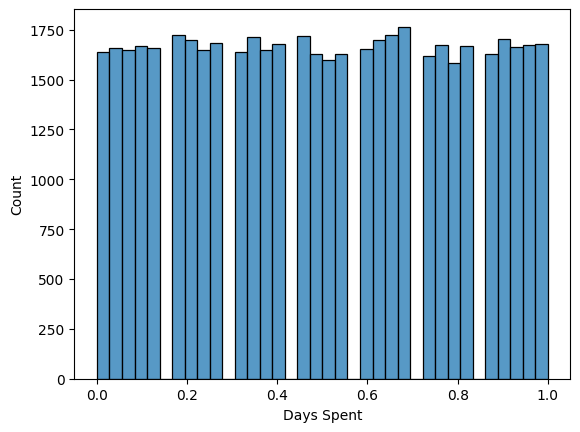

In [247]:
sns.histplot(df['Days Spent'])

## Box Plot

<Axes: ylabel='Age'>

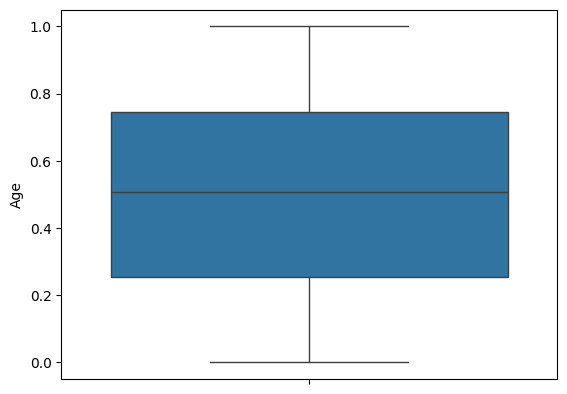

In [248]:
sns.boxplot(y=df['Age'])

<Axes: ylabel='Billing Amount'>

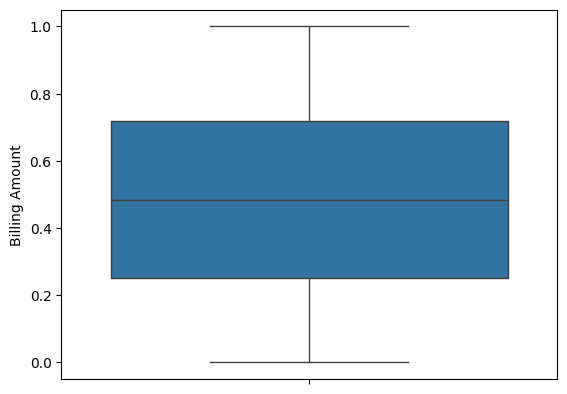

In [249]:
sns.boxplot(y=df['Billing Amount'])

<Axes: ylabel='Days Spent'>

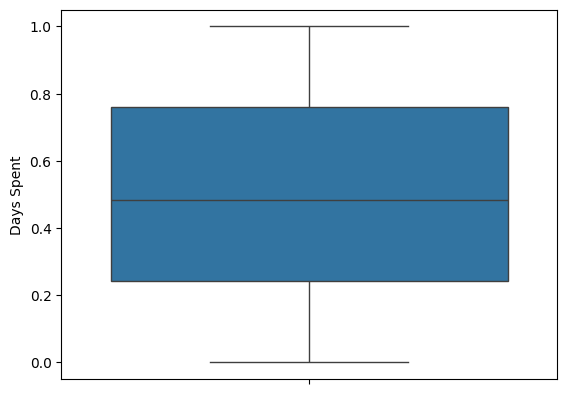

In [250]:
sns.boxplot(y=df['Days Spent'])

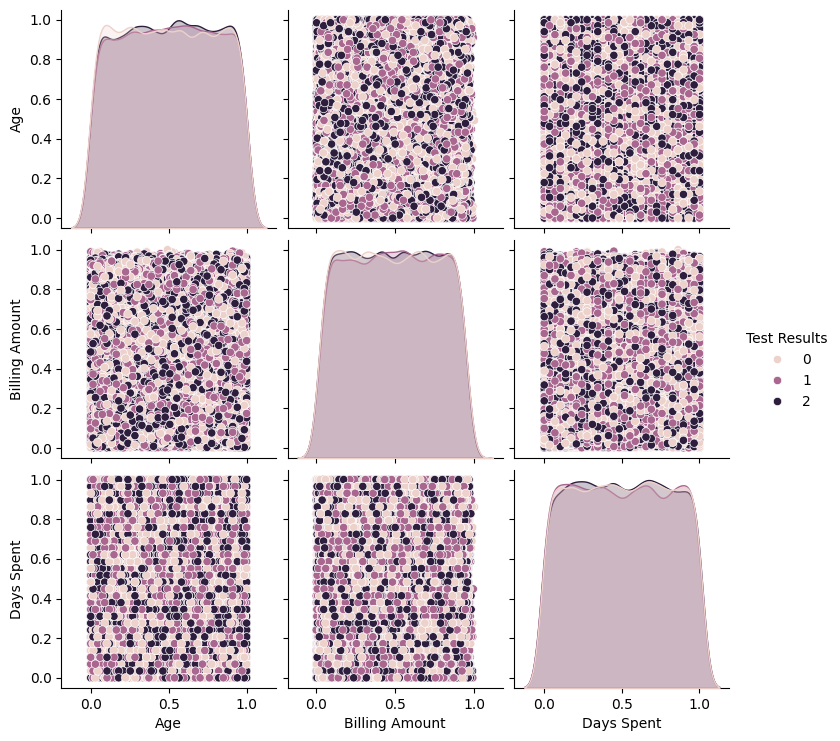

In [251]:
# Pair Plot -> Shows the relationships between all pairs of numeric features, colored by the target.
import seaborn as sns
sns.pairplot(df[['Age', 'Billing Amount', 'Days Spent', 'Test Results']], hue='Test Results')
plt.show()


Checking the relationship between the hospital and the doctors to the test dataset

In [252]:
df_test = pd.read_csv('/content/students_test.csv')

In [253]:
common_doctors = df['Doctor'].isin(df_test['Doctor']).any()

In [254]:
common_doctors.shape

()

Checking for any similarities in both features

In [255]:
df = df.drop('Doctor', axis=1)

In [256]:
common_hospitals = df['Hospital'].isin(df_test['Hospital']).any()

In [257]:
common_hospitals.size

1

In [258]:
df = df.drop('Hospital', axis=1)

In [259]:
df.to_csv("Training_Set_Preprocessed_Final.csv", index=False)

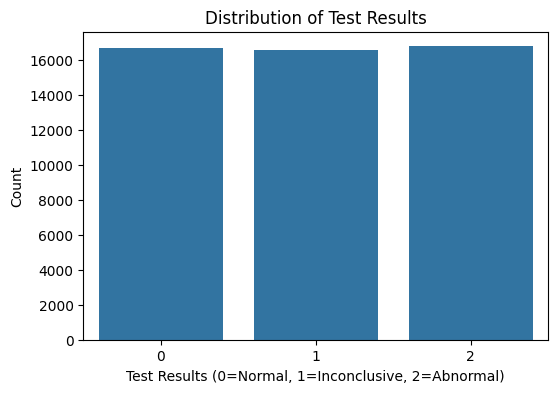

In [260]:
# Target Variable Distribution (Test Results)
plt.figure(figsize=(6,4))
sns.countplot(x='Test Results', data=df)
plt.title("Distribution of Test Results")
plt.xlabel("Test Results (0=Normal, 1=Inconclusive, 2=Abnormal)")
plt.ylabel("Count")
plt.show()

## PCA
Adding PCA to the code and saving it into a csv file

In [261]:
# Step 1: Convert boolean to integers
df = df.copy()
df[df.select_dtypes(include='bool').columns] = df.select_dtypes(include='bool').astype(int)

# Step 2: Apply PCA
pca = PCA(n_components=2)  # or however many components you want
pca_result = pca.fit_transform(df)

# Step 3: Create PCA DataFrame
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])

# Optional: view explained variance
print(pca.explained_variance_ratio_)

[0.12413801 0.09278915]


In [262]:
pca_df.to_csv("PCA_Training_Set_Preprocessed_Final.csv", index=False)

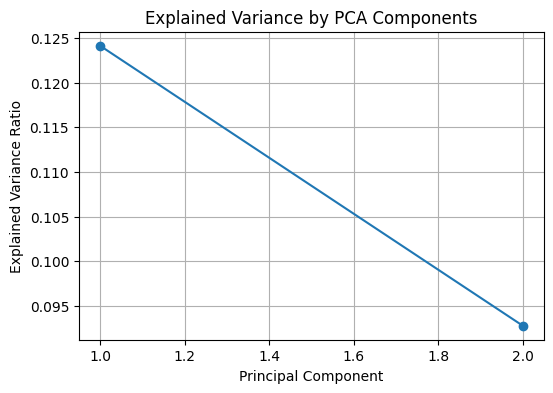

In [263]:
# shows how much variance each principal component captures

plt.figure(figsize=(6,4))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, marker='o')
plt.title('Explained Variance by PCA Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid()
plt.show()

<Axes: xlabel='PC1', ylabel='PC2'>

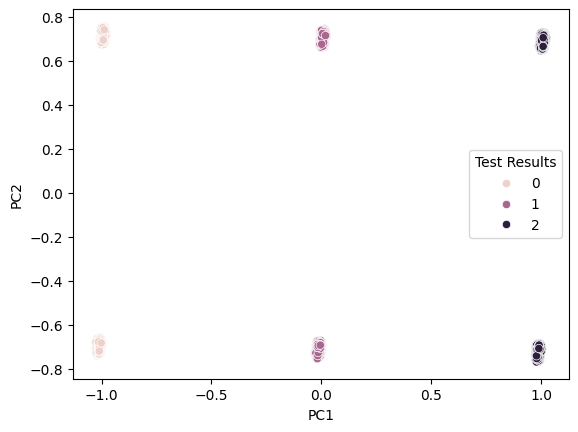

In [264]:
# PCA Scatter Plot
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue=df['Test Results'])

## Duplicates
Checking if there is any duplicates in the dataset and dropping them

In [265]:
duplicates = df.duplicated()

In [266]:
print(duplicates)

0        False
1        False
2        False
3        False
4        False
         ...  
49995    False
49996    False
49997    False
49998    False
49999    False
Length: 50000, dtype: bool


In [267]:
df.drop_duplicates(inplace=True)

In [268]:
df.shape

(50000, 33)